# M6 T01: Algoritmes d'aprenentatge NO supervisat: Agrupació

Anem a practicar i a familiaritzar-nos amb algoritmes de clustering.

_Llegim les dades que estan en format CSV, **DelayedFlights.csv**, per això necessitem carregar la llibreria **pandas**. Aprofitarem per a carregar altres llibreries que necessitarem més endevant_

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


df = pd.read_csv('./../data/DelayedFlights.csv', index_col=0)

_Seleccionem les variables numéricas del nostre conjunt de dades_

In [3]:
dfNUM = df.loc[:,['ArrDelay','ActualElapsedTime','CRSElapsedTime','AirTime','DepDelay','Distance','TaxiIn','TaxiOut']]

In [4]:
dfNUM.shape

(1936758, 8)

_Les dades seleccionades tenen missings, hi ha variables que no són aplicables per a tots els vols. Molts d'aquests missings els hauriem eliminat si haguessim exclòs del nostre conjunt de dades els vols cancel·lats o desviats. En aquesta ocasió els eliminarem ara, utilitzant el **dropna**_

In [5]:
dfNUM2 = dfNUM.dropna()

In [6]:
dfNUM2.shape

(1928371, 8)

_Mirem les correlacions d'aquestes variables:_

In [7]:
corrMatrix = dfNUM2.corr()
print (corrMatrix)

                   ArrDelay  ActualElapsedTime  CRSElapsedTime   AirTime  \
ArrDelay           1.000000           0.068130       -0.015676 -0.000189   
ActualElapsedTime  0.068130           1.000000        0.971122  0.976660   
CRSElapsedTime    -0.015676           0.971122        1.000000  0.986086   
AirTime           -0.000189           0.976660        0.986086  1.000000   
DepDelay           0.952927           0.018492        0.006835 -0.002753   
Distance          -0.029853           0.952980        0.981967  0.980294   
TaxiIn             0.156277           0.166348        0.099693  0.083926   
TaxiOut            0.286484           0.289568        0.123454  0.090398   

                   DepDelay  Distance    TaxiIn   TaxiOut  
ArrDelay           0.952927 -0.029853  0.156277  0.286484  
ActualElapsedTime  0.018492  0.952980  0.166348  0.289568  
CRSElapsedTime     0.006835  0.981967  0.099693  0.123454  
AirTime           -0.002753  0.980294  0.083926  0.090398  
DepDelay       

_Les variables del conjunt de dades estan correlacionades, amb major o menor mesura. Aplicarem anàlisi de components principals per a reduir la dimensionalitat de les nostres variables. Abans de calcular els components principals, estandaritzem les variables per evitar "problemes" amb les diferents magnituds_

In [8]:
scaler = StandardScaler()
dfNUM2 = scaler.fit_transform(dfNUM2)

_Un cop estandaritzades les variables, calculems els dos primers components principals_

In [9]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfNUM2)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])

_Per curiositat, anem a dibuixar aquests dos components principals_

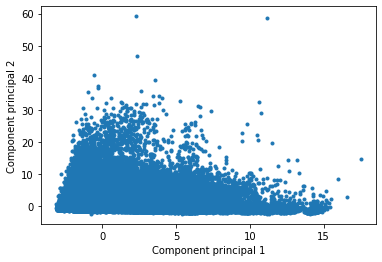

In [11]:
plt.scatter(principalDf['PCA1'],principalDf['PCA2'],marker='.')
plt.xlabel("Component principal 1")
plt.ylabel("Component principal 2")
plt.show()

## Nivell 1 - Exercici 1
Classifica els diferents vols utilitzant l'algorisme de K-means.

_Un cop ja hem creat els dos components principals, apliquem l'algoritme K-means. Creem la classe K-means i ajustem el model amb 3 clusters_

In [12]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [13]:
kmeans.fit(principalDf)

KMeans(init='random', n_clusters=3, random_state=42)

_The lowest SSE value_

In [14]:
kmeans.inertia_

4537559.970296351

_Número d'iteracions fins a convertir:_

In [15]:
kmeans.n_iter_

13

_Punt central dels centroids:_

In [16]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.30481058 -0.38348524]
 [-0.10856953  2.97717668]
 [-0.85404077 -0.37864185]]


_Tornem a dibuixar els dos components principals, però ara amb els centroids (els punts vermells són els punts centrals dels centroids)_

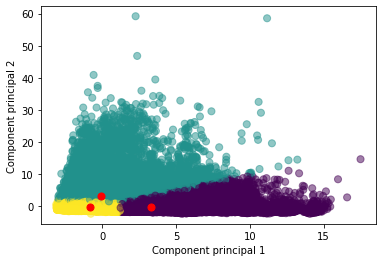

In [17]:
plt.scatter(principalDf['PCA1'], principalDf['PCA2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel("Component principal 1")
plt.ylabel("Component principal 2")
plt.show()

_El valor de K l'escollim nosaltres, a la vista dels resultats, provem amb dos en lloc de tres_

In [18]:
kmeans2 = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [19]:
kmeans2.fit(principalDf)

KMeans(init='random', n_clusters=2, random_state=42)

In [20]:
kmeans2.inertia_

6597874.970893297

In [21]:
kmeans2.n_iter_

13

In [22]:
centroids2 = kmeans2.cluster_centers_
print(centroids2)

[[-0.83214949  0.01938159]
 [ 3.11856411 -0.07263448]]


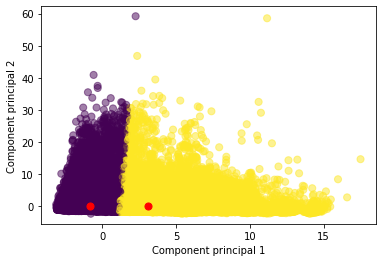

In [23]:
plt.scatter(principalDf['PCA1'], principalDf['PCA2'], c= kmeans2.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids2[:, 0], centroids2[:, 1], c='red', s=50)
plt.xlabel("Component principal 1")
plt.ylabel("Component principal 2")
plt.show()

## Nivell 2 - Exercici 2
Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

_Dibuixem el dendrograma per decidir el número de clusters a fer servir. Per un problema de memoria a l'ordinador, no treballarem amb tot el conjunt de dades, sino que amb una mostra de 5000 dades:_

In [31]:
principalDf.red = principalDf.sample(n=5000)

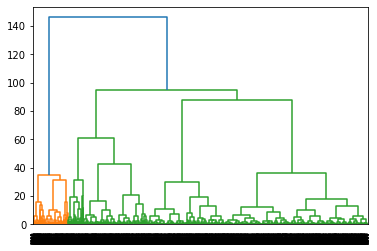

In [32]:
dendrogram = sch.dendrogram(sch.linkage(principalDf.red, method='ward'))

_La línea vertical de màxima distància que no interseccionaa amb altres clusters, correspon a la línea de color blava. Si fem una línea horitzontal a y = 120, ens trobem que només dues línees la creuen. Per tant el nombre de clusters serà dos_

_Fem el clustering jerarquic amb dos clusters:_

In [33]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') 
cluster.fit_predict(principalDf.red)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

_Dibuixem els clusters creats:_

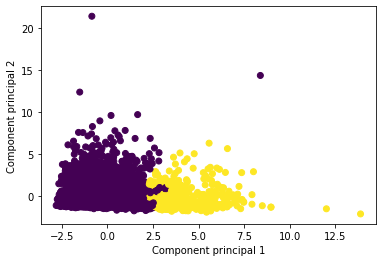

In [34]:
plt.scatter(principalDf.red['PCA1'], principalDf.red['PCA2'], c=cluster.labels_)
plt.xlabel("Component principal 1")
plt.ylabel("Component principal 2")
plt.show()

## Nivell 3 - Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

_Calculem els coeficients de silhouette, per això hem d'aplicar l'agoritme de K-means per a diferents de K i calcular el corresponent coeficient:_ 

In [40]:
silhouette_coefficients = []

In [41]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [42]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(principalDf.red)
    score = silhouette_score(principalDf.red, kmeans.labels_)
    silhouette_coefficients.append(score)

_Dibuixem el coeficient silhouette per als diferents valors de k_

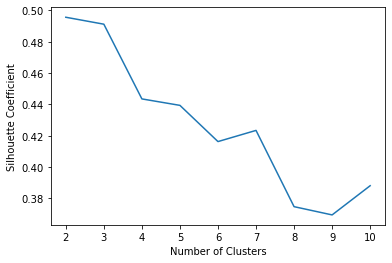

In [43]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

_El valor màxim del coeficient de silhouttte el trobem amb k = 2, per tant la millor opció és k = 2_